In [1]:

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Import libraries and read the csv file into a dataframe
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('megaGymDataset.csv', index_col=0)
df.sample(10)

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
121,Holman Weighted Uppercut Punch,NaN,Strength,Abdominals,Other,Intermediate,NaN,NaN
2201,FYR Tuck Jump,"The tuck jump is a vertical jump, an explosive...",Strength,Quadriceps,Body Only,Intermediate,NaN,NaN
963,Decline Push-Up,The feet-elevated push-up is a variation on th...,Strength,Chest,Body Only,Intermediate,8.6,Average
237,Exercise ball knee roll-in,The exercise ball knee roll-in is an abdominal...,Strength,Abdominals,Body Only,Intermediate,0.0,Average
1049,Butterfly,The machine chest fly is an exercise targeting...,Strength,Chest,Machine,Intermediate,8.5,Average
2826,Sled Overhead Triceps Extension,NaN,Strength,Triceps,Other,Beginner,0.0,NaN
1781,Single-leg depth squat,The single-leg depth squat is an exercise targ...,Strength,Quadriceps,Bands,Intermediate,9.0,Average
2591,HM Single-Leg Overhead Dumbbell Press,NaN,Strength,Shoulders,Dumbbell,Intermediate,NaN,NaN
2759,Standing Two-Arm Overhead Throw,NaN,Plyometrics,Shoulders,Medicine Ball,Beginner,0.0,Average
668,Lateral box jump,The lateral box jump is a plyometric exercise ...,Plyometrics,Adductors,Other,Intermediate,0.0,NaN


In [4]:
# Function that provides quick and useful information about the dataframe
def GiveBasicDetails(data):
    print("Dataframe Size: ",data.shape)
    print("############################")
    print(data.info())
    print("############################")
    print(data.describe())
    print("############################")
    print(data.isna().sum()*100/data.shape[0])

GiveBasicDetails(df)

Dataframe Size:  (2918, 8)
############################
<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   object 
 1   Desc        1368 non-null   object 
 2   Type        2918 non-null   object 
 3   BodyPart    2918 non-null   object 
 4   Equipment   2886 non-null   object 
 5   Level       2918 non-null   object 
 6   Rating      1031 non-null   float64
 7   RatingDesc  862 non-null    object 
dtypes: float64(1), object(7)
memory usage: 205.2+ KB
None
############################
            Rating
count  1031.000000
mean      5.919690
std       3.584607
min       0.000000
25%       3.000000
50%       7.900000
75%       8.700000
max       9.600000
############################
Title          0.000000
Desc          53.118574
Type           0.000000
BodyPart       0.000000
Equipment      1.096642
Level          0.000000
R

In [5]:
# Listing the number of data entries for each categorical variable
cat_cols = ['Type','BodyPart','Equipment','Level','RatingDesc']

for i in cat_cols:
    print(df[i].value_counts())
    print('#####################################')

Type
Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: count, dtype: int64
#####################################
BodyPart
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: count, dtype: int64
#####################################
Equipment
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64
#########################

In [6]:
# Drop any rows that have a null value for Rating
df_rated = df.dropna(subset=['Rating'])
df_rated.isna().sum()

,0
Title,0
Desc,436
Type,0
BodyPart,0
Equipment,29
Level,0
Rating,0
RatingDesc,169


In [7]:
df_rated.drop(columns=['RatingDesc'], inplace=True)

<ipython-input-7-5bd0199ebac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rated.drop(columns=['RatingDesc'], inplace=True)


In [8]:
# Check the value counts for Rating
df_rated['Rating'].value_counts()

,count
Rating,
0.0,244
8.8,52
8.3,49
9.0,43
8.7,42
...,...
4.3,2
1.6,1
2.5,1


In [9]:
# Only include rows where the Rating is nonzero
df_rated = df_rated[df_rated['Rating']!=0.0]


<Axes: ylabel='Count'>

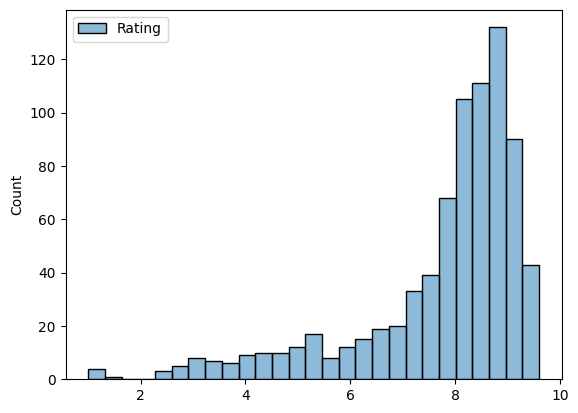

In [10]:
# Distribution of ratings
sns.histplot(df_rated)

Type
Cardio                   8.512500
Olympic Weightlifting    8.433333
Powerlifting             8.365385
Strength                 8.277256
Strongman                7.984615
Plyometrics              7.571795
Stretching               4.890435
Name: Rating, dtype: float64


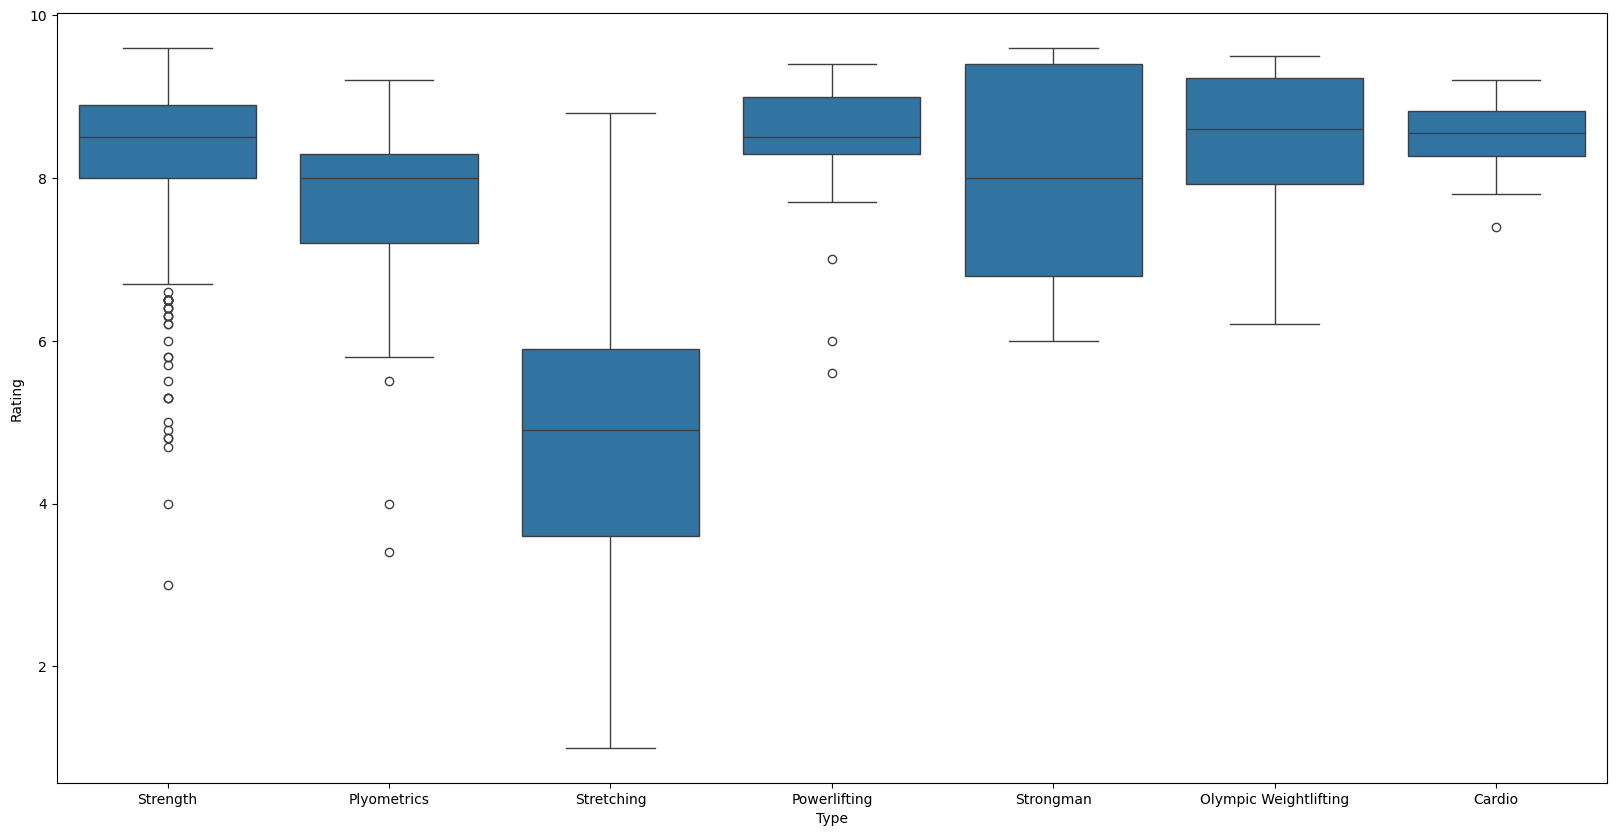


BodyPart
Biceps         8.254902
Triceps        8.187273
Abdominals     8.187209
Forearms       8.109091
Traps          8.018750
Chest          7.990698
Shoulders      7.928182
Middle Back    7.862162
Quadriceps     7.820312
Hamstrings     7.537931
Lats           7.258974
Lower Back     6.816000
Glutes         6.795455
Neck           6.550000
Abductors      6.487500
Adductors      6.270000
Calves         6.257692
Name: Rating, dtype: float64


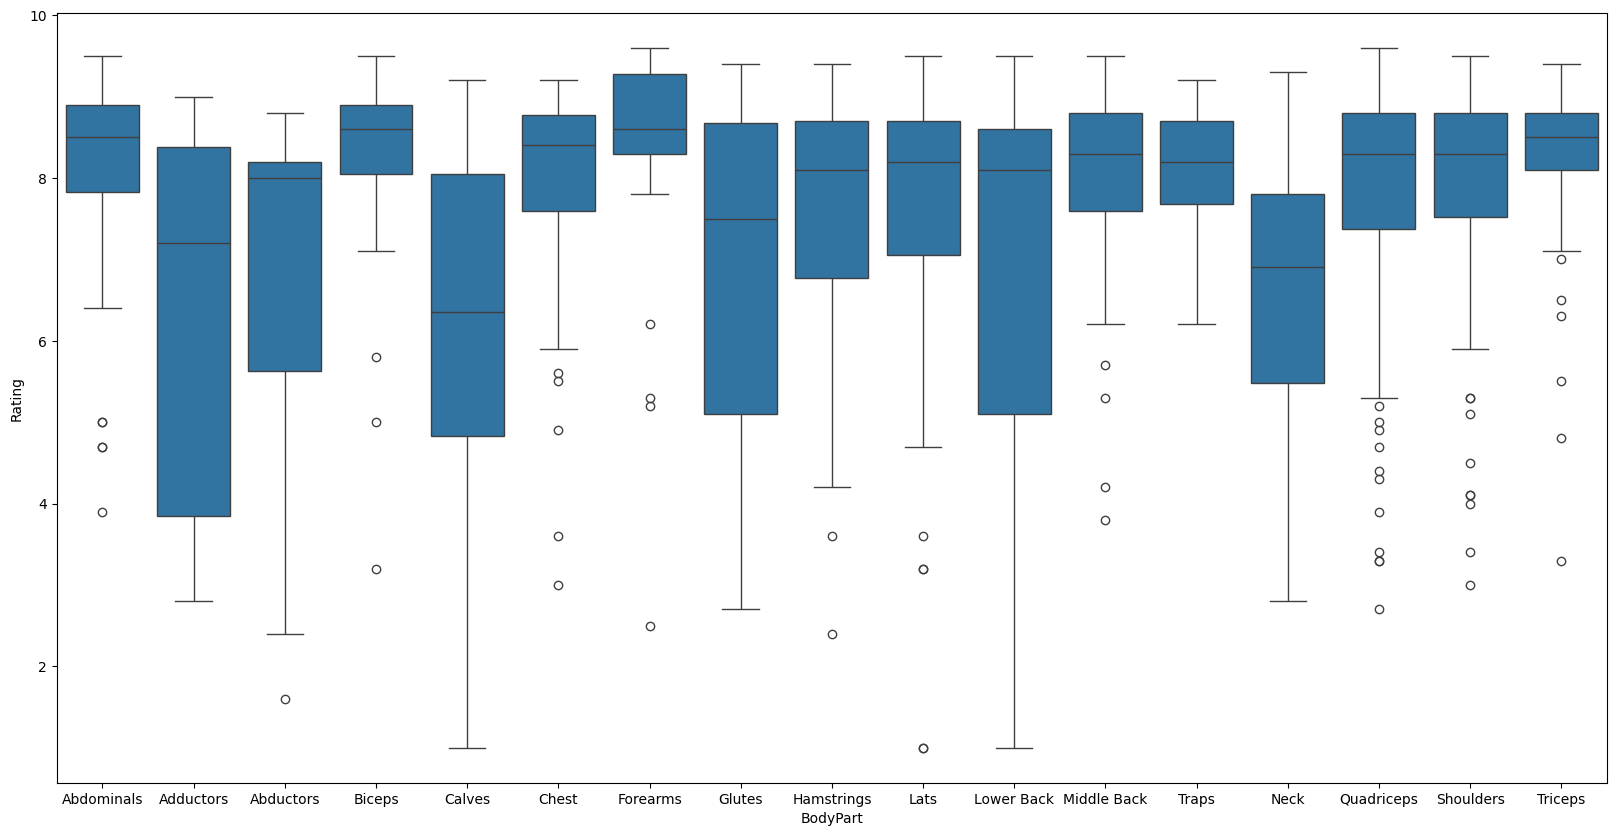


Equipment
E-Z Curl Bar     8.600000
Dumbbell         8.446400
Barbell          8.396377
Cable            8.346753
Machine          8.301538
Kettlebells      7.689189
Other            7.589873
Exercise Ball    7.150000
Body Only        7.039011
Medicine Ball    6.912500
Bands            6.842105
Foam Roll        5.344444
Name: Rating, dtype: float64


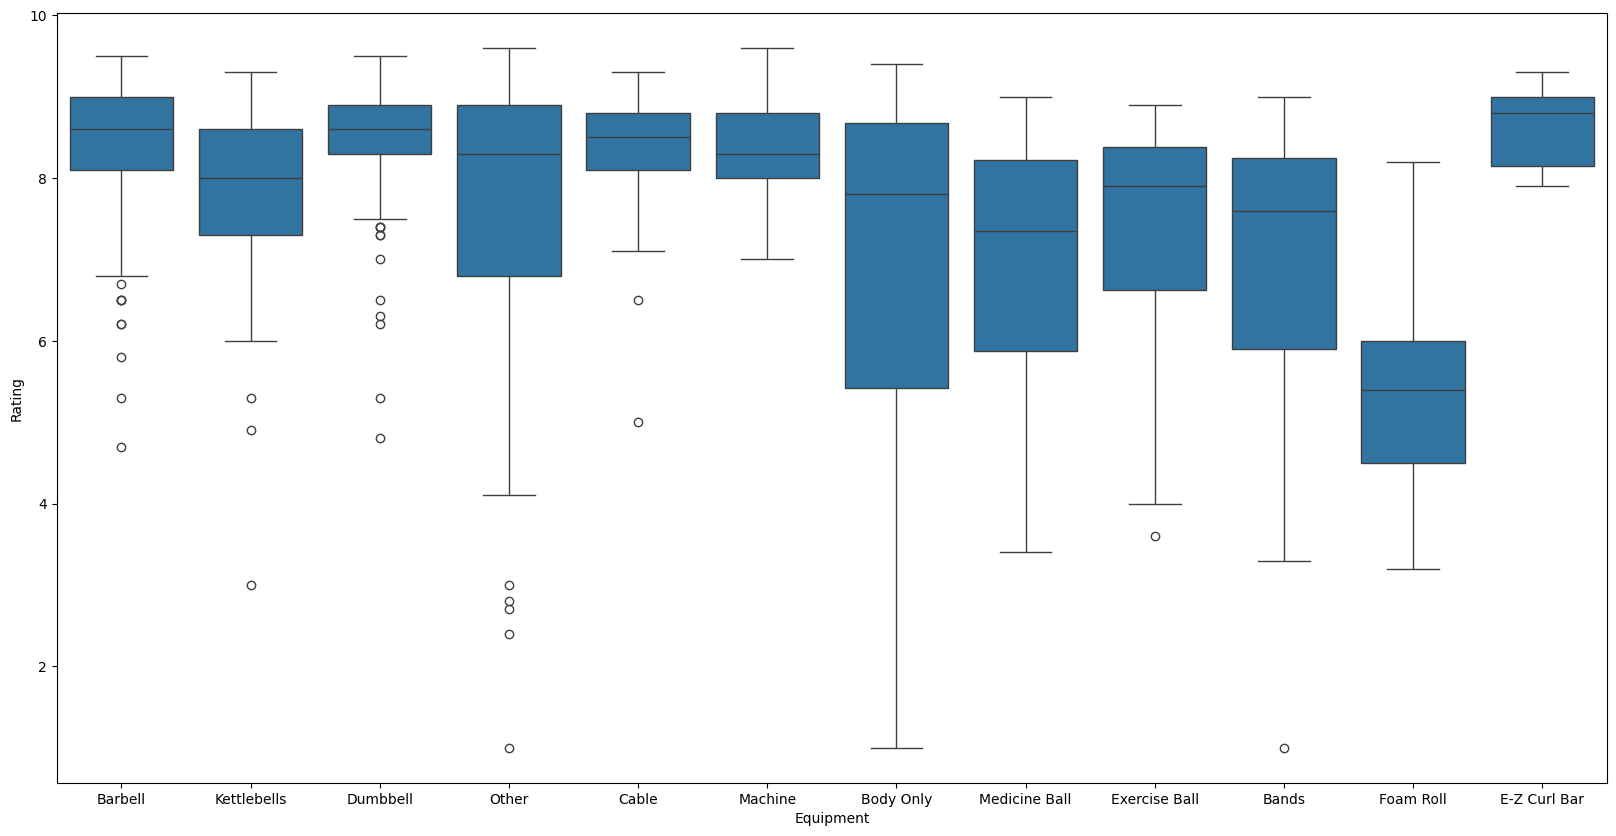


Level
Expert          8.371429
Intermediate    7.975378
Beginner        7.419558
Name: Rating, dtype: float64


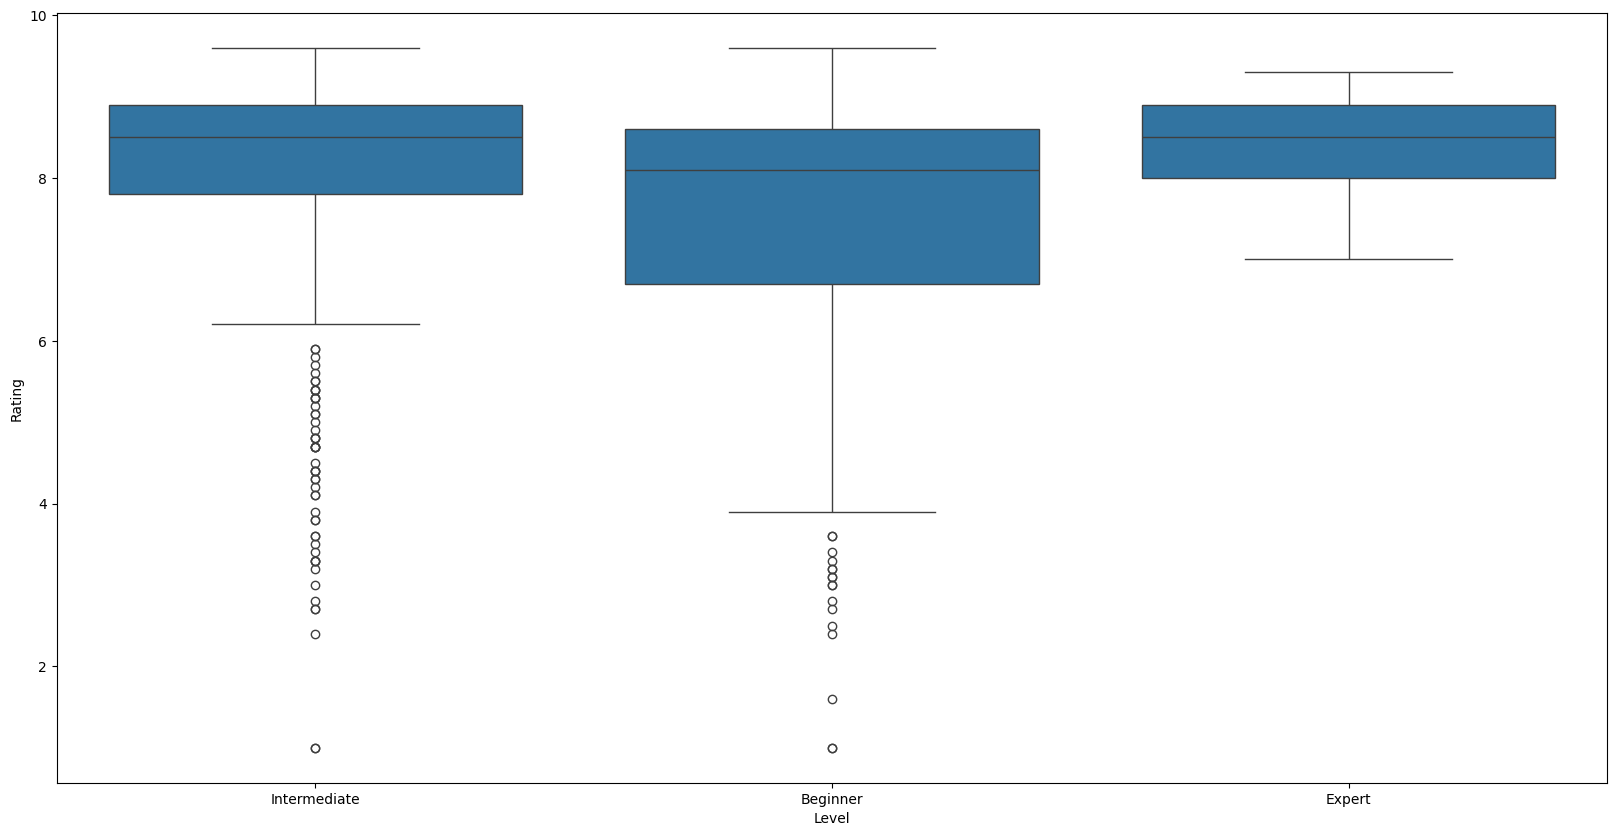

In [11]:
# Finding the mean Ratings and boxplots based on exercise type, bodypart used, equipment used, and level of difficulty
for i in cat_cols[0:4]:
    print(df_rated.groupby(i).Rating.mean().sort_values(ascending=False))
    plt.figure(figsize=(20,10))
    sns.boxplot(x=i, y='Rating', data=df_rated)
    plt.show()
    print()

In [12]:
# Showing the highest and lowest rated exercises in all categories
for i in cat_cols[0:4]:
    df_sorted = df_rated.sort_values(by=[i, 'Rating'], ascending=[True, False])
    print(df_sorted.groupby(i).first())
    print(df_sorted.groupby(i).last())

                                      Title  \
Type                                          
Cardio                         Jumping rope   
Olympic Weightlifting     Clean from Blocks   
Plyometrics             Single Leg Push-off   
Powerlifting           Barbell glute bridge   
Strength                   Single-Leg Press   
Stretching             Standing Hip Circles   
Strongman                    Rickshaw Carry   

                                                                    Desc  \
Type                                                                       
Cardio                 Jumping rope is a classic conditioning exercis...   
Olympic Weightlifting  The push-press is an overhead press variation ...   
Plyometrics            The side-to-side box skip is an explosive lowe...   
Powerlifting           The barbell glute bridge is a popular exercise...   
Strength               The single-leg leg press is an exercise target...   
Stretching             The standing leg swin

In [13]:
# Same as cell above but with maunally customizable category i for a more visually pleasing output
i = 'BodyPart'
df_sorted = df_rated.sort_values(by=[i, 'Rating'], ascending=[True, False])
df_sorted.groupby(i).first()

,Title,Desc,Type,Equipment,Level,Rating
BodyPart,,,,,,
Abdominals,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Other,Intermediate,9.5
Abductors,Standing Hip Circles,Iliotibial band self-myofascial release (SMR) ...,Stretching,Body Only,Beginner,8.8
Adductors,Thigh adductor,The thigh adductor machine is a lower-body exe...,Strength,Machine,Intermediate,9.0
Biceps,Incline Hammer Curls,The wide-grip barbell curl is a variation of t...,Strength,Dumbbell,Beginner,9.5
Calves,Smith Machine Calf Raise,The Smith machine standing calf raise is a mac...,Strength,Machine,Intermediate,9.2
Chest,Pushups,The push-up is a popular bodyweight exercise t...,Strength,Body Only,Intermediate,9.2
Forearms,Rickshaw Carry,The palms-down wrist curl over bench is an exe...,Strongman,Other,Beginner,9.6
Glutes,Barbell glute bridge,The barbell glute bridge is a popular exercise...,Powerlifting,Barbell,Intermediate,9.4
Hamstrings,Barbell Deadlift,The barbell deadlift is a compound exercise us...,Strength,Barbell,Intermediate,9.4


In [14]:
df_sorted.groupby(i).last()

,Title,Desc,Type,Equipment,Level,Rating
BodyPart,,,,,,
Abdominals,Overhead Stretch,The seated bar twist is a core exercise meant ...,Stretching,Body Only,Intermediate,3.9
Abductors,Single-leg lying cross-over stretch,The single-leg lying cross-over stretch is a s...,Stretching,Body Only,Beginner,1.6
Adductors,Lying Bent Leg Groin,Adductor self-myofascial release (SMR) is a se...,Stretching,Other,Beginner,2.8
Biceps,Brachialis SMR,Brachialis self-myofascial release (SMR) is a ...,Stretching,Foam Roll,Beginner,3.2
Calves,Posterior Tibialis Stretch,The wall calf stretch is a stretch targeting t...,Stretching,Bands,Intermediate,1.0
Chest,Pass-through stretch with band,The pass-through stretch with band is a popula...,Stretching,Other,Beginner,3.0
Forearms,Wrist Circles,The partner farmer's walk is a protocol for pe...,Stretching,Body Only,Beginner,2.5
Glutes,One Knee To Chest,The lying glute stretch is a stretch to help i...,Stretching,Body Only,Intermediate,2.7
Hamstrings,Chair Leg Extended Stretch,The alternating lunge jump is an explosive bod...,Stretching,Other,Beginner,2.4
